# **GPU Test**

In [2]:
!nvidia-smi

Sun May 12 20:18:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Connect Google Drive to Google Colab**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Download Data**

Dataset: https://universe.roboflow.com/na-u7nn0/safety-vest-i1uyc/dataset/1
Download it and save it in your project folder

In [4]:
!unzip '/content/drive/MyDrive/Safety/safety-vest.v1i.yolov8.zip'

Archive:  /content/drive/MyDrive/Safety/safety-vest.v1i.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/00011_jpg.rf.1a4653ca4e1e6bc79ad1a9f240c210b2.jpg  
 extracting: test/images/00022_jpg.rf.ed0030f3e7d7f382e1a5c67613f187e1.jpg  
 extracting: test/images/00027_jpg.rf.ec0fc0db1f9265fcc946c51155cfba9f.jpg  
 extracting: test/images/00035_jpg.rf.83b35b066b489c0879422ecf6842094f.jpg  
 extracting: test/images/00052_jpg.rf.08e74be9e5429bf8f04d6d53d9c4368f.jpg  
 extracting: test/images/00119_jpg.rf.1783fc8d822bf3eb1213108f2179f717.jpg  
 extracting: test/images/00126_jpg.rf.59f2b7b4f2cd7e813f3d7af2be5d6512.jpg  
 extracting: test/images/00131_jpg.rf.e75a184177f9725d162e1c69da380618.jpg  
 extracting: test/images/00275_jpg.rf.dd8b6f1aed6bf910ab115a0a88278212.jpg  
 extracting: test/images/00347_jpg.rf.74baad1882dc44475ef86bb1466dee25.jpg  
 ext

# **Connect with MLFlow**

In [5]:
!pip install mlflow
!pip install pyngrok
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.6/756.6 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cache

In [6]:
from ultralytics import settings

# Update a setting
settings.update({'mlflow': True})

# Reset settings to default values
settings.reset()

# **YOLOv8**

In [7]:
from ultralytics import YOLO

In [8]:
#Check if yolo works
!yolo predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg"

100% 6.23M/6.23M [00:00<00:00, 77.8MB/s]
Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 476k/476k [00:00<00:00, 13.8MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 87.5ms
Speed: 13.3ms preprocess, 87.5ms inference, 2748.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [9]:
#Train yolo on your dataset
!yolo task=detect mode=train model=yolov8l.pt data=../content/data.yaml epochs=10 imgsz=640

100% 83.7M/83.7M [00:00<00:00, 248MB/s]
Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=../content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

# **Model results with MLFlow**

In [10]:
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass

**Make an account on dashboard.ngrok to provide the authtoken to access MLFlow**

In [11]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com
··········
 * ngrok tunnel "https://ddb2-34-68-41-220.ngrok-free.app" -> "http://127.0.0.1:5000"


In [12]:
#run this cell then click on the above link
!mlflow server --backend-store-uri 'runs/mlflow'

[2024-05-12 20:34:24 +0000] [6120] [INFO] Starting gunicorn 22.0.0
[2024-05-12 20:34:24 +0000] [6120] [INFO] Listening at: http://127.0.0.1:5000 (6120)
[2024-05-12 20:34:24 +0000] [6120] [INFO] Using worker: sync
[2024-05-12 20:34:24 +0000] [6125] [INFO] Booting worker with pid: 6125
[2024-05-12 20:34:24 +0000] [6126] [INFO] Booting worker with pid: 6126
[2024-05-12 20:34:24 +0000] [6127] [INFO] Booting worker with pid: 6127
[2024-05-12 20:34:24 +0000] [6128] [INFO] Booting worker with pid: 6128
[2024-05-12 20:36:49 +0000] [6120] [INFO] Handling signal: int

Aborted!
[2024-05-12 20:36:49 +0000] [6125] [INFO] Worker exiting (pid: 6125)
[2024-05-12 20:36:49 +0000] [6126] [INFO] Worker exiting (pid: 6126)
[2024-05-12 20:36:49 +0000] [6127] [INFO] Worker exiting (pid: 6127)
[2024-05-12 20:36:49 +0000] [6128] [INFO] Worker exiting (pid: 6128)
[2024-05-12 20:36:50 +0000] [6120] [INFO] Shutting down: Master


# **Test on random image**

In [17]:
#you can change the source with any image you want to test the model on
!yolo predict model=/content/runs/detect/train/weights/best.pt source="https://t4.ftcdn.net/jpg/03/73/14/13/360_F_373141367_QC9hERN9vtUr0dDK7BTjQwI8zEWc2UuI.jpg"

Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

100% 74.8k/74.8k [00:00<00:00, 6.18MB/s]
image 1/1 /content/360_F_373141367_QC9hERN9vtUr0dDK7BTjQwI8zEWc2UuI.jpg: 448x640 1 Goggles, 5 HardHats, 3 Vests, 107.2ms
Speed: 4.4ms preprocess, 107.2ms inference, 1985.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


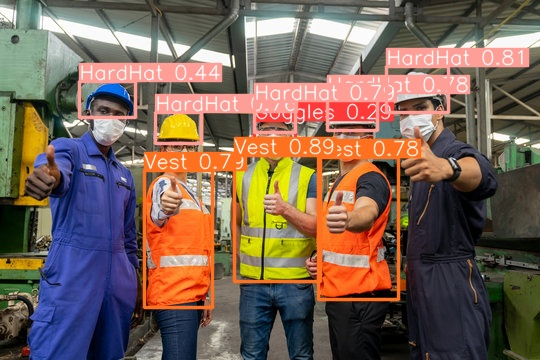

In [19]:
#filename = "put your path to the prediction of image you will find it in /content/runs/detect/...."
from IPython.display import Image
Image(filename="/content/runs/detect/predict3/360_F_373141367_QC9hERN9vtUr0dDK7BTjQwI8zEWc2UuI.jpg", width=600)

# **Testing the Model on Testset**

In [20]:
!yolo detect val model=/content/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100% 106/106 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:09<00:00,  1.40s/it]
                   all        106        279      0.858      0.776      0.811      0.481
               Goggles        106         35      0.895       0.73      0.758      0.345
               HardHat        106         69      0.802      0.765      0.762      0.456
                  Vest        106        175      0.878      0.834      0.911      0.642
Speed: 7.0ms preprocess, 36.2ms inference, 0.0ms loss, 21.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
